In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [2]:
from scipy.stats import norm

In [3]:
import glob
import os
import pandas as pd
import numpy as np

from utils.datatools import * # getPatientsTable()
from utils.viztools import *  # plotPatientLRZDiff(patient, FWdata)

In [4]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
STDPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(STDPATH, "Controls")
PD_PATH = os.path.join(STDPATH, "PD")

FIGPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD_result_viz/"
FIG_CONTROL = os.path.join(FIGPATH, "Controls")
FIG_PD = os.path.join(FIGPATH, "PD")

In [5]:
patients = getPatientsTable()
# patients.head()
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


In [6]:
error = pd.read_csv(os.path.join(PHASEPATH, "error.csv"))
error = error[error["FW_BW"] == "FW"]
CONTROL_ERROR = error[error["Category"] == "Controls"]
PD_ERROR = error[error["Category"] == "PD"]
print("Controls error patient count:", len(CONTROL_ERROR))
print("PD error patient count:", len(PD_ERROR))

Controls error patient count: 1
PD error patient count: 10


In [7]:
patients.head()

,Patient,Category,cntFW,cntBW
0,BHY,Controls,3,3
1,CHH,Controls,3,3
2,HSH,Controls,3,3
3,JHY,Controls,3,3
4,JJG,Controls,3,3


In [44]:
LH_RH_SUB_CONTROL = []
LH_RH_DIFF_SUB_CONTROL = []
for PATIENT in CONTROL["Patient"].values:
    results = glob.glob(os.path.join(FIG_CONTROL, f"{PATIENT}*.npy"))
    
    for target in results:
        LH, RH, LH_DIFF, RH_DIFF = np.load(target)
        
        LH_RH_SUB_CONTROL.append(LH - RH)
        LH_RH_DIFF_SUB_CONTROL.append(LH_DIFF - RH_DIFF)

(array([ 2.,  0.,  2.,  1.,  3., 21., 25.,  5.,  1.,  3.]),
 array([-5366.67702  , -4407.8397399, -3449.0024598, -2490.1651797,
        -1531.3278996,  -572.4906195,   386.3466606,  1345.1839407,
         2304.0212208,  3262.8585009,  4221.695781 ]),
 <BarContainer object of 10 artists>)

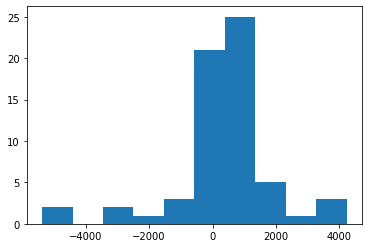

In [45]:
fig, ax = plt.subplots(1,1)
ax.hist(LH_RH_SUB_CONTROL)

In [46]:
print("mean:", np.mean(LH_RH_SUB_CONTROL))
print("std:", np.std(LH_RH_SUB_CONTROL))

mean: 360.3548608730155
std: 1565.5728372941462


(array([ 1.,  1.,  1.,  3., 18., 33.,  4.,  1.,  0.,  1.]),
 array([-119.843771 ,  -95.9467306,  -72.0496902,  -48.1526498,
         -24.2556094,   -0.358569 ,   23.5384714,   47.4355118,
          71.3325522,   95.2295926,  119.126633 ]),
 <BarContainer object of 10 artists>)

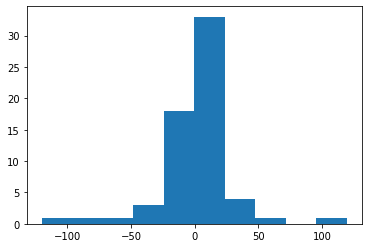

In [47]:
fig, ax = plt.subplots(1,1)
ax.hist(LH_RH_DIFF_SUB_CONTROL)

In [48]:
print("mean:", np.mean(LH_RH_DIFF_SUB_CONTROL))
print("std:", np.std(LH_RH_DIFF_SUB_CONTROL))

mean: -0.0686737936507954
std: 29.226771145607895


In [49]:
LH_RH_SUB_PD = []
LH_RH_DIFF_SUB_PD = []
for PATIENT in PD["Patient"].values:
    results = glob.glob(os.path.join(FIG_PD, f"{PATIENT}*.npy"))
    
    for target in results:
        LH, RH, LH_DIFF, RH_DIFF = np.load(target)
        
        LH_RH_SUB_PD.append(LH - RH)
        LH_RH_DIFF_SUB_PD.append(LH_DIFF - RH_DIFF)

(array([ 1.,  1.,  1.,  2., 14., 71., 92., 35., 15.,  2.]),
 array([-10349.097979 ,  -8689.6530452,  -7030.2081114,  -5370.7631776,
         -3711.3182438,  -2051.87331  ,   -392.4283762,   1267.0165576,
          2926.4614914,   4585.9064252,   6245.351359 ]),
 <BarContainer object of 10 artists>)

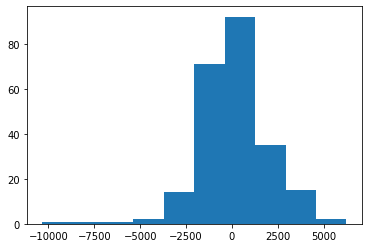

In [50]:
fig, ax = plt.subplots(1,1)
ax.hist(LH_RH_SUB_PD)

In [51]:
print("mean:", np.mean(LH_RH_SUB_PD))
print("std:", np.std(LH_RH_SUB_PD))

mean: 142.97332588461543
std: 1830.5223180195273


(array([  2.,   2.,   6.,  62., 147.,  13.,   1.,   0.,   0.,   1.]),
 array([-145.402474 , -109.2018494,  -73.0012248,  -36.8006002,
          -0.5999756,   35.600649 ,   71.8012736,  108.0018982,
         144.2025228,  180.4031474,  216.603772 ]),
 <BarContainer object of 10 artists>)

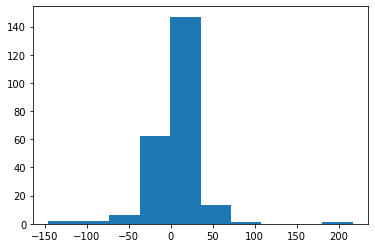

In [52]:
fig, ax = plt.subplots(1,1)
ax.hist(LH_RH_DIFF_SUB_PD)

In [43]:
print("mean:", np.mean(LH_RH_DIFF_SUB_PD))
print("std:", np.std(LH_RH_DIFF_SUB_PD))

mean: 3.9423622564102545
std: 27.75444782036892


---

#### 두 개 같이

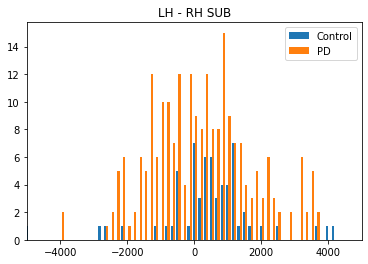

In [78]:
fig, ax = plt.subplots(1,1)
ax.hist([LH_RH_SUB_CONTROL, LH_RH_SUB_PD], label=["Control", "PD"], bins=100)
ax.set_title("LH - RH SUB")
ax.set_xlim(-5000, 5000)
ax.legend()

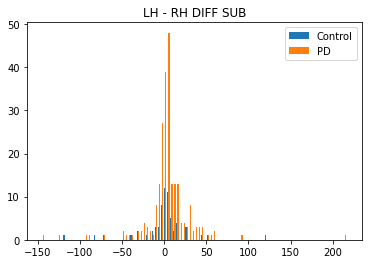

In [79]:
fig, ax = plt.subplots(1,1)
ax.hist([LH_RH_DIFF_SUB_CONTROL, LH_RH_DIFF_SUB_PD], label=["Control", "PD"], bins=100)
ax.set_title("LH - RH DIFF SUB")
ax.legend()